In [35]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import unittest
#mpl.rc('figure', figsize=[30,30])  #set the default figure size
#%matplotlib inline

In [36]:
def create_labels(g):
    labels = {}
    for n in g.nodes():
        labels[n] = n
    return labels
arguments = {'node_size':100, 'font_size':8, 'alpha':0.3}

In [37]:
def girvan_newman(G, k=2):
    '''Return a list of k lists of nodes, each forming a 
    community.'''
    
    # REPLACE THE FOLLOWING PLACEHOLDER CODE WITH YOUR OWN
    if len(G.nodes()) == 1:
        return [G.nodes()]

    def find_best_edge(G0):
        """
        Networkx implementation of edge_betweenness
        returns a dictionary. Make this into a list,
        sort it and return the edge with highest betweenness.
        """
        eb = nx.edge_betweenness_centrality(G0)
        eb_il = list(eb.items())
        eb_il.sort(key=lambda x: x[1], reverse=True)
        return eb_il[0][0]

    components = list(nx.connected_component_subgraphs(G))

    while len(components) < k:
        G.remove_edge(*find_best_edge(G))
        components = list(nx.connected_component_subgraphs(G))

    result = [c.nodes() for c in components]
    return result


# PLEASE DO NOT MODIFY THE TEST CODE BELOW WHICH (ALONG WITH OTHER SUCH TESTS) 
# WILL BE USED TO TEST YOUR IMPLEMENTATION

class TestCommunities(unittest.TestCase):
        
    def setUp(self):
        
        self.g = nx.Graph()
        self.g.add_edges_from([
            (1, 2),(1, 3), (2, 3),
            (2, 4), (3, 4),
            (4, 5), (5, 6), (4, 6),
            (7, 8), (7, 9), (8, 9),
            (5, 9)
        ])

        
    def test_gn(self):    
        
        nx.draw(self.g, labels=create_labels(self.g), **arguments)
        
        components = girvan_newman(self.g, 2)
        c_set = {frozenset(c) for c in components}
        self.assertEqual(c_set,
            {
                frozenset([1, 2, 3, 4, 5, 6]),
                frozenset([7, 8, 9])
            })
    
        components = girvan_newman(self.g, 3)
        c_set = {frozenset(c) for c in components}
        self.assertEqual(c_set,
            {
                frozenset([1, 2, 3]),
                frozenset([4, 5, 6]),
                frozenset([7, 8, 9])
            })
        
        


suite = unittest.TestLoader().loadTestsFromModule(TestCommunities())
unittest.TextTestRunner().run(suite)
        

.
----------------------------------------------------------------------
Ran 1 test in 0.024s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [38]:
def color_node(g, gn_rv):
    colors = {}
    l = []
    #tot = len(gn_rv)
    for i in range(len(gn_rv)):
        for node in gn_rv[i]:
            colors[node] = i
            
    color_list = []
    for x in g.nodes():
        y = colors[x]
        color_list.append(y)
    return color_list

In [39]:
def read(n):
    filename = str(n)+'.edges'
    #g = nx.Graph()
    g = nx.read_edgelist(filename)
    return g

In [40]:
def run(n, k=10):
    g = read(n)
    gn = girvan_newman(g, 10)
    draw_pdf(g, gn, n)

In [41]:
def draw_pdf(g, gn, n):
    #TODO Size and viz
    plt.clf()
    arguments1 = {'node_size':100, 'font_size':8, 'alpha':0.3}
    nx.draw_networkx(g, labels=create_labels(g), node_color=color_node(g, gn), **arguments1)
    plt.savefig('ego'+str(n)+'.pdf')

In [42]:
def run_all():
    for x in [3980, 348, 3437]:
        run(x, 10)

In [43]:
run_all()

In [32]:
run(3980)

In [18]:
g = read(3980)

In [19]:
gn = girvan_newman(g, 10)

In [20]:
gn

[['3992',
  '4037',
  '4009',
  '4021',
  '3998',
  '4018',
  '4026',
  '4033',
  '4030',
  '3997',
  '4000',
  '4017',
  '3982',
  '3986',
  '4014',
  '4019',
  '4003',
  '3981',
  '3994',
  '4023',
  '4002'],
 ['4012', '3987'],
 ['4025', '4007', '3990', '4016'],
 ['3988', '3995', '3993', '3985'],
 ['4001', '4029'],
 ['4034'],
 ['594',
  '4020',
  '4004',
  '4006',
  '4032',
  '3991',
  '4031',
  '4038',
  '4011',
  '4027',
  '3989',
  '4013'],
 ['4005', '3999', '4036'],
 ['4028', '3996'],
 ['3983']]

In [30]:
col = color3(g, gn)

In [31]:
col

[0,
 1,
 2,
 3,
 4,
 1,
 5,
 6,
 3,
 0,
 0,
 7,
 7,
 0,
 6,
 6,
 0,
 0,
 3,
 6,
 0,
 6,
 6,
 8,
 2,
 4,
 6,
 0,
 0,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 9,
 3,
 2,
 0,
 0,
 0,
 0,
 7,
 6,
 0,
 0,
 8,
 0,
 2,
 6,
 0]

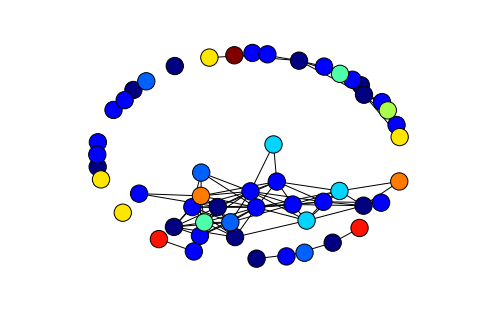

In [45]:
nx.draw(g, node_color=col)

In [ ]:
%matplotlib inline

In [11]:
n0 = read(0)
draw(n0)

In [12]:
gn348 = girvan_newman(n0, 10)

In [26]:
plt.clf()

In [27]:
nx.draw_networkx(n0, labels=create_labels(n0), node_color=color_node(gn348), **arguments)

In [28]:
plt.savefig('temp5.png')

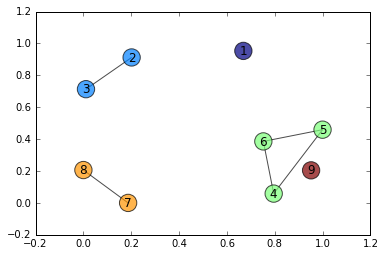

In [110]:
nx.draw_networkx(b, labels=create_labels(b), node_color=color_node(gn), alpha=0.7)

In [96]:
eb = nx.edge_betweenness_centrality(b)
eb_il = list(eb.items())
eb_il.sort(key=lambda x: x[1], reverse=True)
eb_il

[((4, 5), 0.027777777777777776),
 ((2, 3), 0.027777777777777776),
 ((5, 6), 0.027777777777777776),
 ((7, 8), 0.027777777777777776),
 ((4, 6), 0.027777777777777776)]

In [10]:
def create_graph():
    g = nx.Graph()
    g.add_edges_from([
            (1, 2),(1, 3), (2, 3),
            (2, 4), (3, 4),
            (4, 5), (5, 6), (4, 6),
            (7, 8), (7, 9), (8, 9),
            (5, 9)
        ])
    return g

def draw(g):
    return nx.draw(g, labels=create_labels(g), **arguments)

In [32]:
g.nodes()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

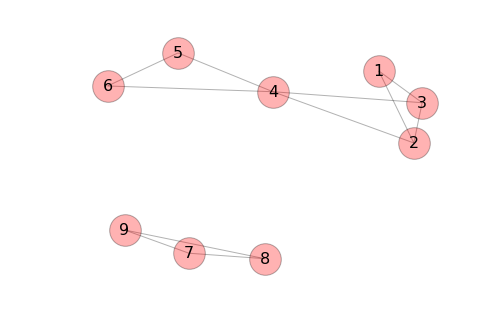

In [49]:
nx.draw(g, labels=create_labels(g), **arguments)

Question 1
Chapter 4
Exercise 2 (a)

In [4]:
Bi = nx.Graph()
Bi.add_edges_from([('John Doerr', 'Amazon'), ('John Doerr', 'Google'),
                  ('Shirley Tighman', 'Google'),
                  ('Arthur Levinson', 'Google'), ('Arthur Levinson', 'Apple'),
                  ('Al Gore', 'Apple'),
                  ('Steve Jobs', 'Apple'), ('Steve Jobs', 'Disney'),
                  ('Andrea Jung', 'Apple'), ('Andrea Jung', 'General Electric'),
                  ('Susan Hockfield', 'General Electric'),
                 ])

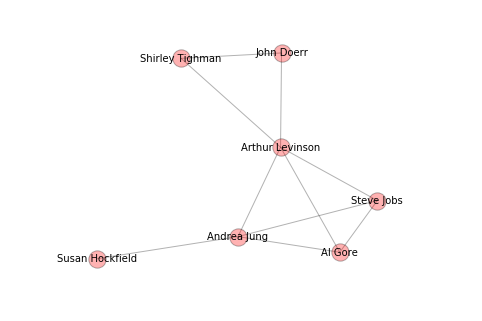

In [10]:
memb = ['John Doerr', 'Shirley Tighman', 'Arthur Levinson','Al Gore',
     'Steve Jobs', 'Andrea Jung', 'Susan Hockfield']
G = nx.algorithms.bipartite.projected_graph(Bi, memb, multigraph=True)
#print([sorted((u,v)) for u,v in G.edges()])
nx.draw(G, labels=create_labels(G), **arguments)

Exercise 2 (b)

In [47]:
a =zip(g, col)

In [49]:
list(a)

[('4004', 0.0),
 ('3998', 0.0),
 ('4000', 0.0),
 ('3988', 0.0),
 ('3999', 0.0),
 ('3996', 0.0),
 ('4034', 0.0),
 ('3981', 0.0),
 ('4019', 0.0),
 ('4016', 0.0),
 ('4027', 0.0),
 ('4031', 0.0),
 ('3993', 0.1),
 ('4018', 0.1),
 ('3986', 0.1),
 ('4021', 0.1),
 ('4007', 0.1),
 ('3995', 0.1),
 ('4011', 0.1),
 ('4012', 0.1),
 ('4036', 0.1),
 ('4009', 0.1),
 ('4002', 0.1),
 ('3991', 0.1),
 ('3982', 0.1),
 ('4033', 0.1),
 ('4020', 0.1),
 ('4013', 0.1),
 ('4014', 0.1),
 ('4032', 0.1),
 ('4030', 0.1),
 ('4001', 0.1),
 ('4025', 0.1),
 ('3985', 0.2),
 ('3997', 0.2),
 ('4003', 0.2),
 ('4028', 0.2),
 ('4037', 0.3),
 ('4017', 0.3),
 ('4026', 0.3),
 ('3994', 0.4),
 ('4038', 0.4),
 ('3989', 0.5),
 ('4029', 0.6),
 ('3990', 0.6),
 ('594', 0.6),
 ('3983', 0.6),
 ('3992', 0.7),
 ('4023', 0.7),
 ('4005', 0.8),
 ('3987', 0.8),
 ('4006', 0.9)]

In [29]:
def color3(g, gn_rv):
    colors = {}
    l = []
    #tot = len(gn_rv)
    for i in range(len(gn_rv)):
        for node in gn_rv[i]:
            colors[node] = i
            
    color_list = []
    for x in g.nodes():
        y = colors[x]
        color_list.append(y)
    return color_list

In [84]:
def color2(G):
    # color nodes the same in each connected subgraph
    # layout graphs with positions using graphviz neato
    '''
    try:
        from networkx import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either PyGraphviz or Pydot")

    pos=nx.graphviz_layout(G,prog="neato")
    '''
    C=nx.connected_component_subgraphs(G)
    n = 1.0
    for g in C:
        c=[n/10]*nx.number_of_nodes(g) # random color...
        n+=1.0
        nx.draw_networkx(g,
            node_color=c,
            with_labels=False
            )
    plt.savefig("atlas.png",dpi=75)
    #plt.show()

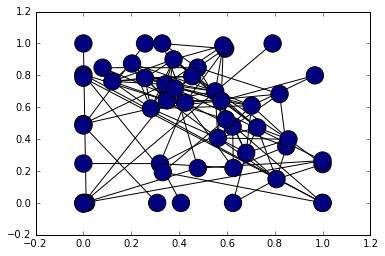

In [85]:
color2(g)

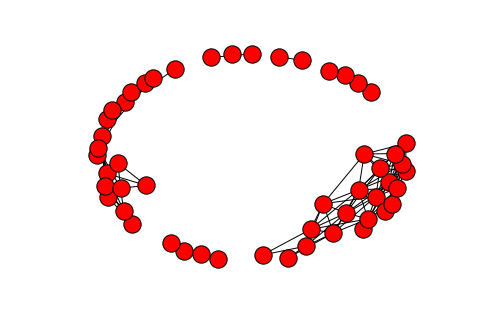

In [64]:
nx.draw(g)

In [65]:
random.random()

0.09147677743461524

In [66]:
C=nx.connected_component_subgraphs(g)

In [68]:
a = list(C)

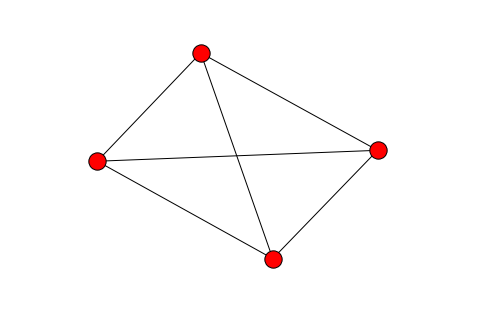

In [72]:
nx.draw(a[2])